In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# !pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def som_pie_grid(som, data, labels):
    """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
    labels_map = som.labels_map(data, labels)
    label_names = np.unique(labels)

    plt.figure(figsize=(70, 70))
    the_grid = GridSpec(70, 70)
    for position in labels_map.keys():
        label_fracs = [labels_map[position][lab] for lab in label_names]
        plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)

    plt.show()

    # Cheating way to align legend, create a separate figure just
    # for legend.  Will have superfluous whitespace below
    plt.legend(patches, label_names, loc="upper left", ncol=5)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [4]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

<IPython.core.display.Javascript object>

In [6]:
df = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In [8]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [9]:
df.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


<IPython.core.display.Javascript object>

In [10]:
df["Pos"].value_counts()

SG       458
PG       410
PF       386
SF       341
C        286
SF-SG      4
PF-C       3
SG-SF      2
PF-SF      2
SG-PF      1
PG-SG      1
C-PF       1
Name: Pos, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
keep = ["C", "PG", "SG"]
df = df[df["Pos"].isin(keep)]
df["Pos"].value_counts()

SG    458
PG    410
C     286
Name: Pos, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
df = df.drop(columns=["Player", "Tm"])

<IPython.core.display.Javascript object>

In [15]:
X = df.drop(columns=["Pos"])
y = df["Pos"]

<IPython.core.display.Javascript object>

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [26]:
som = MiniSom(x=5, y=3, random_seed=21, input_len=X_scaled.shape[1])
som.pca_weights_init(X_scaled)

<IPython.core.display.Javascript object>

In [27]:
som.train_random(data=X_scaled, num_iteration=100)

<IPython.core.display.Javascript object>

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

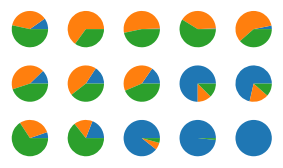

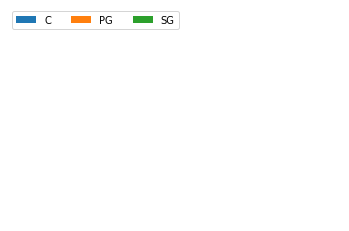

<IPython.core.display.Javascript object>

In [28]:
som_pie_grid(som, X_scaled, y)

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

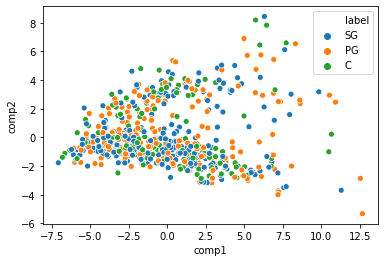

<IPython.core.display.Javascript object>

In [24]:
pca = PCA(n_components=2).fit_transform(X_scaled)
pca_df = pd.DataFrame(pca, columns=["comp1", "comp2"])
pca_df["label"] = y

sns.scatterplot(data=pca_df, x="comp1", y="comp2", hue="label")

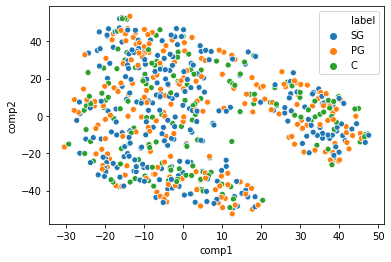

<IPython.core.display.Javascript object>

In [25]:
tsne = TSNE(n_components=2).fit_transform(X_scaled)
tsne_df = pd.DataFrame(tsne, columns=["comp1", "comp2"])
tsne_df["label"] = y

sns.scatterplot(data=tsne_df, x="comp1", y="comp2", hue="label")